<a href="https://colab.research.google.com/github/Anuj12Pokharel/Anuj/blob/main/Fake_Currency_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
#Loading the datasets
DATA_DIR = '/content/drive/MyDrive/dataset'
classes = os.listdir(DATA_DIR)
print(classes)

['validation', 'train']


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [1154,510]
#convert all images to RGB Color
from PIL import Image
import os


# Set the paths to your dataset
train_data_dir = '/content/drive/MyDrive/Test1_data'
validation_data_dir = '/content/drive/MyDrive/hi'

In [ ]:
   from tensorflow.keras.preprocessing.image import ImageDataGenerator

# re-size all the images to this
IMAGE_SIZE = [1154,510]
# Set the paths to your dataset
train_data_dir = '/content/drive/MyDrive/Test1_data'
validation_data_dir = '/content/drive/MyDrive/hi'

# Set the image dimensions
img_width, img_height = 64, 64

# Set batch size and number of epochs
batch_size = 16
epochs = 50

# Data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Rescaling for the validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

# Load and preprocess the validation data
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(img_width, img_height),
                                                              batch_size=batch_size,
                                                              class_mode='binary')

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)
model.save('/content/drive/MyDrive/Colab Notebooks/m7_model.h5')  # Replace 'your_model.h5' with the desired file path

Found 400 images belonging to 2 classes.
Found 221 images belonging to 2 classes.
Epoch 1/50
25/25 [==============================] - 23s 941ms/step - loss: 0.0589 - accuracy: 0.9875 - val_loss: 0.1066 - val_accuracy: 0.9760
Epoch 2/50
25/25 [==============================] - 19s 776ms/step - loss: 0.0605 - accuracy: 0.9875 - val_loss: 0.1084 - val_accuracy: 0.9760
Epoch 3/50
25/25 [==============================] - 18s 733ms/step - loss: 0.0582 - accuracy: 0.9875 - val_loss: 0.0975 - val_accuracy: 0.9760
Epoch 4/50
25/25 [==============================] - 18s 746ms/step - loss: 0.0591 - accuracy: 0.9875 - val_loss: 0.0815 - val_accuracy: 0.9808
Epoch 5/50
25/25 [==============================] - 22s 903ms/step - loss: 0.0637 - accuracy: 0.9875 - val_loss: 0.0850 - val_accuracy: 0.9760
Epoch 6/50
25/25 [==============================] - 23s 949ms/step - loss: 0.0647 - accuracy: 0.9875 - val_loss: 0.0634 - val_accuracy: 0.9856
Epoch 7/50
25/25 [==============================] - 17s 688m

In [ ]:
history

In [ ]:
import matplotlib.pyplot as plt

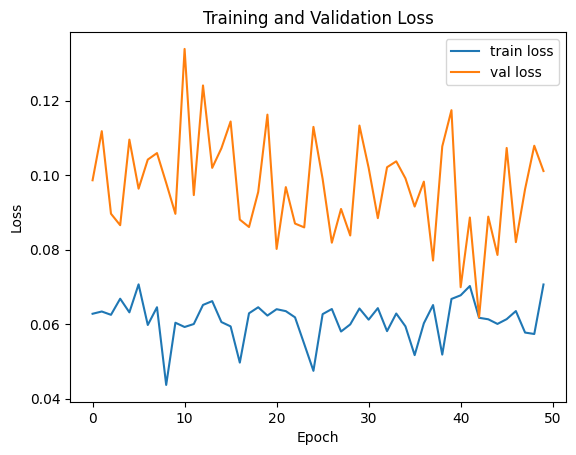

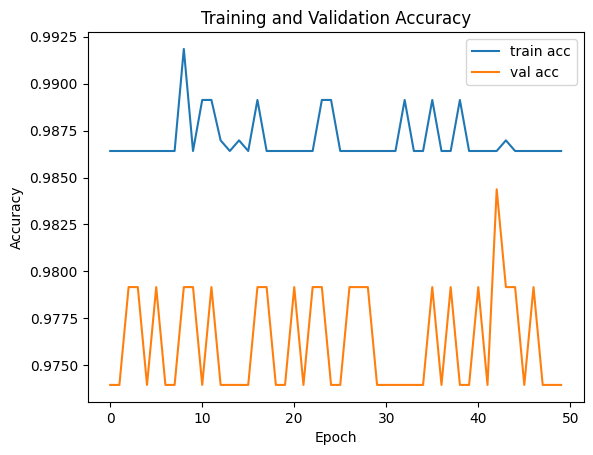

In [ ]:


# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss')
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc')
plt.show()


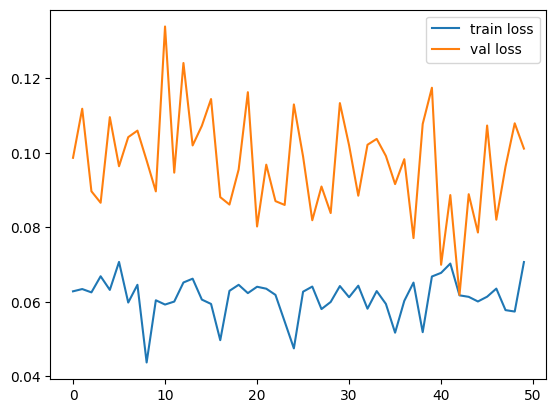

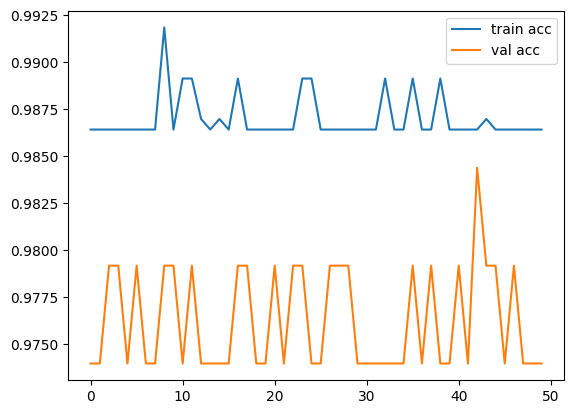

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the new image
new_image_path = '/content/fake_image (1).PNG'  # Replace with the path to your new image
img = image.load_img(new_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1

# Make predictions using the trained model
prediction = model.predict(img_array)

# Convert the prediction to a class label (0 or 1)
predicted_class = 'real' if prediction > 0.5 else 'fake'

# Display the result
print(f'The model predicts the note as : {predicted_class} (Probability: {prediction[0][0]})')

1/1 [==============================] - 0s 118ms/step
The model predicts the note as : fake (Probability: 7.515703337457325e-11)


In [ ]:
pip install pillow


In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.7 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl si

In [ ]:
import requests
import torch
from PIL import Image
from torchvision import transforms

In [ ]:
from ipywidgets import FileUpload, Button, Output
import ipywidgets as widgets
from PIL import Image
import io  # Import the io module
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model_path = '/content/drive/MyDrive/Colab Notebooks/my_model.h5'
model = load_model(model_path)

# Define a function to preprocess the image and make predictions
def preprocess_image(img):
    img = img.resize((64, 64))  # Resize the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values to be between 0 and 1
    return img_array

def predict_currency(change):
    img = Image.open(io.BytesIO(upload_widget.data[-1]))
    img_array = preprocess_image(img)
    prediction = model.predict(img_array)
    predicted_class = 'real' if prediction > 0.5 else 'fake'
    output_widget.clear_output()
    with output_widget:
        print(f"Prediction: {predicted_class}, Confidence: {prediction[0][0]}")

upload_widget = FileUpload(description="Upload")
button = Button(description="Predict")
output_widget = Output()

button.on_click(predict_currency)

widgets.VBox([upload_widget, button, output_widget])


1/1 [==============================] - 0s 92ms/step


In [ ]:
+def predict(inp):
  inp = transforms.ToTensor()(inp).unsqueeze(0)
  with torch.no_grad():
    prediction = torch.nn.functional.softmax(model(inp)[0], dim=0)
    confidences = {classes[i]: float(prediction[i]) for i in range(2)}
  return confidences

In [ ]:
pip install gradio

Found 400 images belonging to 2 classes.
13/13 [==============================] - 9s 687ms/step


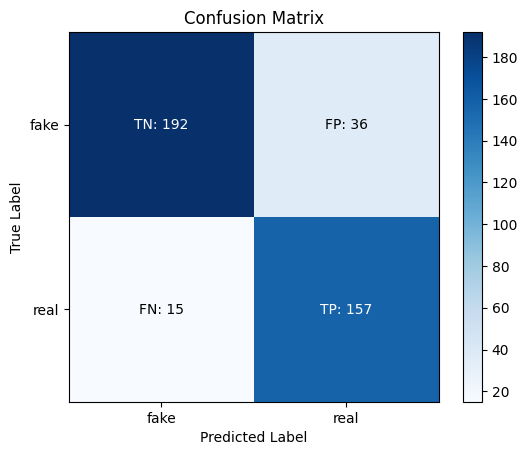

              precision    recall  f1-score   support

        real       0.93      0.84      0.88       228
        fake       0.81      0.91      0.86       172

    accuracy                           0.87       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.88      0.87      0.87       400



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model
model_path = '/content/drive/MyDrive/Colab Notebooks/my_model.h5'
model = load_model(model_path)

# Data directory containing both real and fake notes for testing
test_data_dir = '/content/drive/MyDrive/Test1_data'

# Image dimensions
img_width, img_height = 64, 64

# Batch size
batch_size = 32

# Data generator for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the test data
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=False)

# Predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)

# True classes
true_classes = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')

# Add text annotations for TN, TP, FP, FN
plt.text(0, 0, f'TN: {conf_matrix[0, 0]}', color='white', ha='center', va='center')
plt.text(1, 0, f'FP: {conf_matrix[0, 1]}', color='black', ha='center', va='center')
plt.text(0, 1, f'FN: {conf_matrix[1, 0]}', color='black', ha='center', va='center')
plt.text(1, 1, f'TP: {conf_matrix[1, 1]}', color='white', ha='center', va='center')

plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0, 1], labels=['fake', 'real'])
plt.yticks(ticks=[0, 1], labels=['fake', 'real'])

# Show the plot
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=['real', 'fake']))


In [ ]:
pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

In [ ]:
import gradio as gr
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model_path = '/content/drive/MyDrive/Colab Notebooks/my_model.h5'
model = load_model(model_path)

# Define a function to preprocess the image and make predictions
def preprocess_image(img):
    img = img.resize((64, 64))  # Resize the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values to be between 0 and 1
    return img_array

def predict_currency(image):
    img = Image.fromarray(image)
    img_array = preprocess_image(img)
    prediction = model.predict(img_array)
    predicted_class = 'real' if prediction > 0.5 else 'fake'
    confidence = prediction[0][0]
    return f"Given Currency is: {predicted_class}"

# Create the interface
gr.Interface(predict_currency, "image", "text", title="Fake Currency Detection System").launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a7cade6f39e282914d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
